## Tien Duong

# Gun census (FBI Record)
## Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Project Overview
 Welcome to the exploratory data analysis of the relation between population census dataset and gun record information. The `gun census` file contain total of 27 columns and 12485 rows. The file is the record of information comes from the FBI's national instant Criminal Background check system or NICS. Whenever there is a firearm purchase, gunshop's owner will run a check through the NICS system to ensure that the buyer meet all of the qualification before their purchase. Accompanying the NICS dataset is the U.S. census dataset of which contain serveral variables at the state level. Most variables have only one data point per state (2016), but a few have data for more than one year (poverty).
<a href="https://www.census.gov/">Census link</a>


### Project Objective
1. Extract and 

<a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a5623_ncis-and-census-data/ncis-and-census-data.zip">Census and FBI gun Data</a>


### Libary using in this data investigation report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Importing the FBI gun data record
gun_info = pd.read_csv('nics-firearm-background-checks.csv')
gun_info.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-08,Alabama,35838.0,548.0,26449.0,16913.0,1943.0,1075,0.0,25.0,...,0.0,0.0,0.0,33.0,24.0,5.0,1.0,2.0,0.0,85347
1,2020-08,Alaska,143.0,89.0,4088.0,4113.0,404.0,254,0.0,0.0,...,0.0,0.0,0.0,12.0,5.0,0.0,1.0,0.0,0.0,9363
2,2020-08,Arizona,9377.0,1003.0,25375.0,12472.0,2233.0,2316,0.0,6.0,...,1.0,0.0,0.0,23.0,9.0,3.0,0.0,1.0,0.0,54095
3,2020-08,Arkansas,3266.0,990.0,9821.0,7421.0,619.0,389,13.0,15.0,...,0.0,0.0,0.0,7.0,10.0,1.0,0.0,2.0,0.0,23980
4,2020-08,California,33056.0,0.0,65196.0,38505.0,8409.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145797


In [3]:
# checking for missing data
gun_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14410 entries, 0 to 14409
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14410 non-null  object 
 1   state                      14410 non-null  object 
 2   permit                     14386 non-null  float64
 3   permit_recheck             3025 non-null   float64
 4   handgun                    14390 non-null  float64
 5   long_gun                   14391 non-null  float64
 6   other                      7425 non-null   float64
 7   multiple                   14410 non-null  int64  
 8   admin                      14387 non-null  float64
 9   prepawn_handgun            12467 non-null  float64
 10  prepawn_long_gun           12465 non-null  float64
 11  prepawn_other              7040 non-null   float64
 12  redemption_handgun         12470 non-null  float64
 13  redemption_long_gun        12469 non-null  flo

In [4]:
# Importing the census data record
census = pd.read_csv('U.S. Census Data.csv')
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
# Getting only useful column
census = census.iloc[[0,28]]
census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
28,"Median gross rent, 2011-2015",NaN,$717,"$1,146",$913,$677,"$1,255","$1,002","$1,075","$1,018",...,655,764,$882,$887,$895,"$1,116","$1,014",$643,$776,$789


In [6]:
# changing column to index
census = census.transpose(copy=True)


# census

52 columns 85 rows 

### Tidiness
- Wrong data type in all columns
- un-necessary columns

### Cleanliness
- missing data fact note
- inconsistent with values within columns
- vermont and west virgina have let z
- inconsistent percentage value
----------------------------

# Gun
27 columns 14410 rows
### Tidiness
- month wrong data type

### Cleanliness
- column name not readable


# Data Cleaning

### Census
- Drop the unnecessary rows in census
- get person over 18 july 2016

## Census cleaning

In [7]:
# reset index with numeric variables
census.reset_index(inplace=True)

In [8]:
# change dataframe columns name 
census.columns = ['state','population', 'median_rent']

In [9]:
# Dropping the first two rows within dataframe
census.drop([0,1],inplace=True)

In [10]:
# removes and replace strings
census.median_rent = census.median_rent.str.replace('[\$\,]', '').astype(int)
census.population = census.population.str.replace(',','').astype(int)

In [11]:
census.head()

,state,population,median_rent
2,Alabama,4863300,717
3,Alaska,741894,1146
4,Arizona,6931071,913
5,Arkansas,2988248,677
6,California,39250017,1255


# Gun cleaning

In [12]:
gun_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14410 entries, 0 to 14409
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14410 non-null  object 
 1   state                      14410 non-null  object 
 2   permit                     14386 non-null  float64
 3   permit_recheck             3025 non-null   float64
 4   handgun                    14390 non-null  float64
 5   long_gun                   14391 non-null  float64
 6   other                      7425 non-null   float64
 7   multiple                   14410 non-null  int64  
 8   admin                      14387 non-null  float64
 9   prepawn_handgun            12467 non-null  float64
 10  prepawn_long_gun           12465 non-null  float64
 11  prepawn_other              7040 non-null   float64
 12  redemption_handgun         12470 non-null  float64
 13  redemption_long_gun        12469 non-null  flo

In [13]:
gun_info['state'].nunique()

55

In [14]:
# We will only be using the state, permit and totals column
gun_info = gun_info[['month','state','permit','totals', 'handgun','long_gun','multiple']]
gun_info.head()

,month,state,permit,totals,handgun,long_gun,multiple
0,2020-08,Alabama,35838.0,85347,26449.0,16913.0,1075
1,2020-08,Alaska,143.0,9363,4088.0,4113.0,254
2,2020-08,Arizona,9377.0,54095,25375.0,12472.0,2316
3,2020-08,Arkansas,3266.0,23980,9821.0,7421.0,389
4,2020-08,California,33056.0,145797,65196.0,38505.0,0


In [15]:
# SAving the dataframe
gun_info.to_csv('gun.csv')
census.to_csv('census.csv')

### Below is what we dropped from the census's footnote
### NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.																																
Value Notes																		
1	Includes data not distributed by county.																	
																		
Fact Notes																		
(a)	Includes persons reporting only one race																	
(b)	Hispanics may be of any race, so also are included in applicable race categories																	
(c)	Economic Census - Puerto Rico data are not comparable to U.S. Economic Census data																	
																		
Value Flags																		
-	Either no or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest or upper interval of an open ended distribution.																	
D	Suppressed to avoid disclosure of confidential information																	
F	Fewer than 25 firms																	
FN	Footnote on this item in place of data																	
NA	Not available																	
S	Suppressed; does not meet publication standards																	
X	Not applicable																	
Z	Value greater than zero but less than half unit of measure shown																	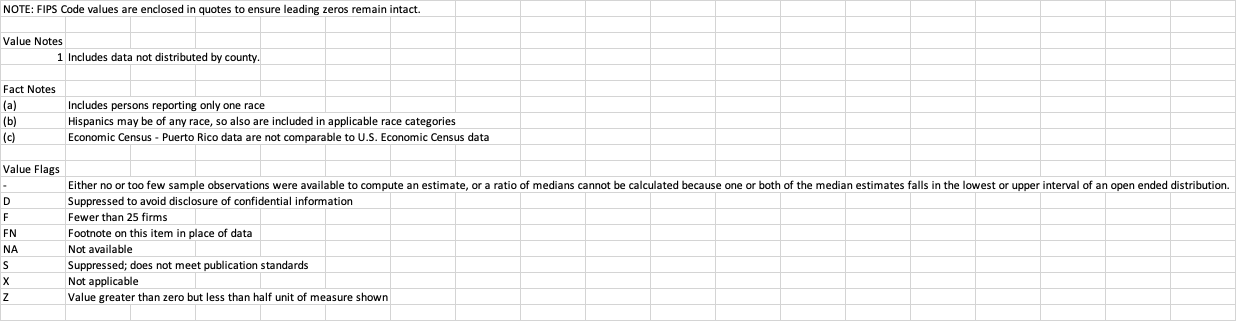

<a id='eda'></a>
# Exploratory Data Analysis
### Question?
State w

In [16]:
gun = pd.read_csv('gun.csv')
census = pd.read_csv('census.csv')
census.drop(columns='Unnamed: 0',inplace=True)

In [17]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14410 entries, 0 to 14409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14410 non-null  int64  
 1   month       14410 non-null  object 
 2   state       14410 non-null  object 
 3   permit      14386 non-null  float64
 4   totals      14410 non-null  int64  
 5   handgun     14390 non-null  float64
 6   long_gun    14391 non-null  float64
 7   multiple    14410 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 900.8+ KB


### Census
- state with most population visual
- state with highest median rent

##### State with most population

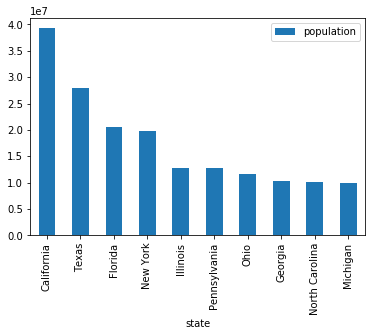

In [18]:
pop_10 = census.sort_values('population', ascending=False)
pop_10[:10].plot(kind='bar', x='state', y='population');

we got california and Texas are two states with most people... consider for their size and great economy

##### State with most rent

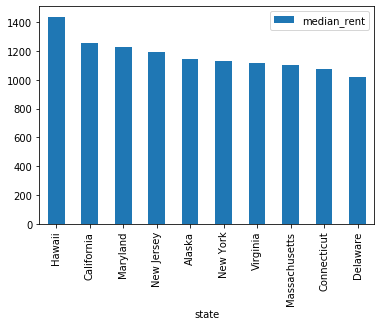

In [19]:
census.sort_values('median_rent', ascending=False)[:10].plot(kind='bar', x='state' , y='median_rent')

Suprisingly Hawaii got the highest median rent.

#### Correlation between population and rent?

In [20]:
census.corr()

,population,median_rent
population,1.000000,0.324983
median_rent,0.324983,1.000000


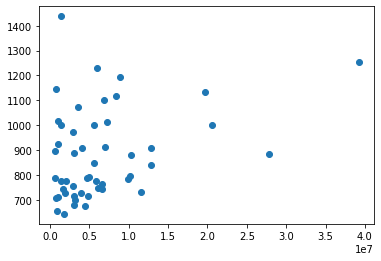

In [21]:
plt.scatter(data=census, x='population', y='median_rent');

# Gun

In [22]:
# Converting month to datatime
gun['month']= pd.to_datetime(gun['month'])
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14410 entries, 0 to 14409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  14410 non-null  int64         
 1   month       14410 non-null  datetime64[ns]
 2   state       14410 non-null  object        
 3   permit      14386 non-null  float64       
 4   totals      14410 non-null  int64         
 5   handgun     14390 non-null  float64       
 6   long_gun    14391 non-null  float64       
 7   multiple    14410 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 900.8+ KB


In [23]:
# Viewing correlation between numeric variables
gun.corr()

,Unnamed: 0,permit,totals,handgun,long_gun,multiple
Unnamed: 0,1.000000,-0.166349,-0.269665,-0.341287,-0.068449,-0.129142
permit,-0.166349,1.000000,0.729855,0.209402,0.142836,0.090907
totals,-0.269665,0.729855,1.000000,0.586599,0.489580,0.289266
handgun,-0.341287,0.209402,0.586599,1.000000,0.595916,0.420599
long_gun,-0.068449,0.142836,0.489580,0.595916,1.000000,0.310874
multiple,-0.129142,0.090907,0.289266,0.420599,0.310874,1.000000


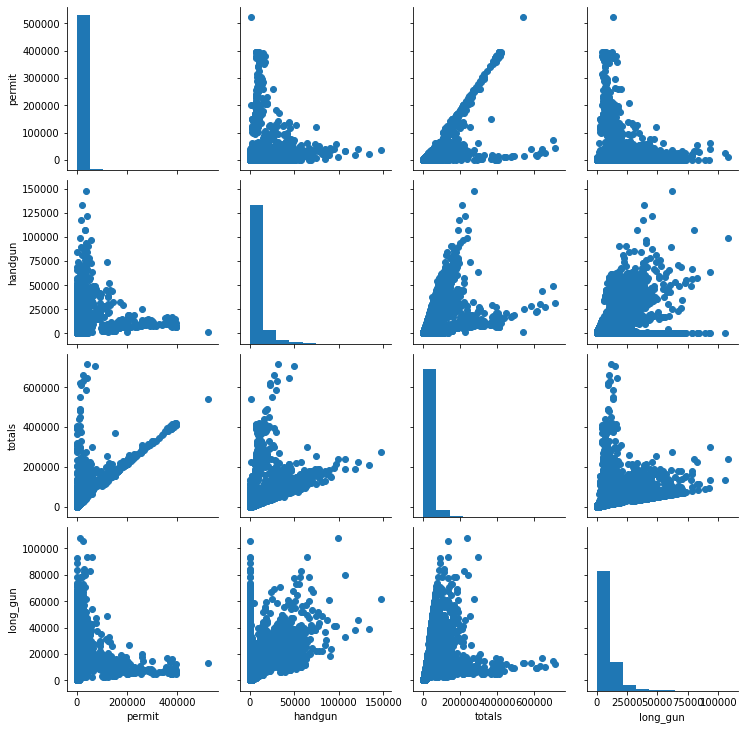

In [24]:
g = sb.PairGrid(data=gun, vars =['permit','handgun', 'totals', 'long_gun'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

If we observe closely total and permits are closely relate. That's meant the more numbers of background check, there'are more likely with gun permit.

#### Distribution of total

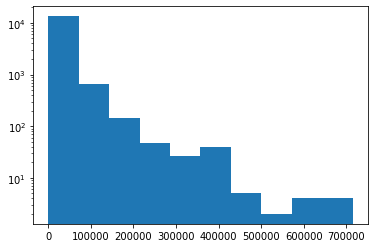

In [25]:
# Distribution of totals column with xscale log
plt.hist(gun.totals)
plt.yscale('log');

According to our chart, majority of background check is around 100000. 

#### Relation number of background check on total, permit and handgun

Text(0, 0.5, 'total')

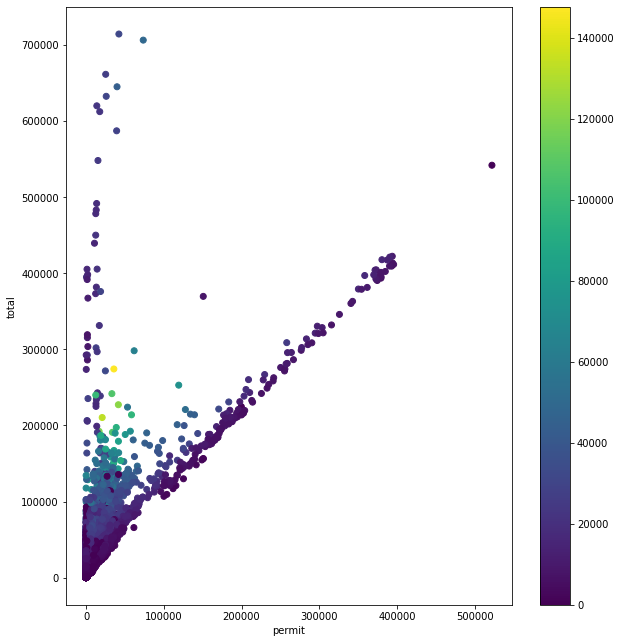

In [26]:
plt.figure(figsize=(10,11))
plt.scatter(data=gun,x='permit', y='totals', c='handgun')
plt.colorbar()
plt.xlabel('permit')
plt.ylabel('total')

There's correlation of numbers with totals and permit. On the other hand, handgun does not have much relation.

#### average background check from year 2011-2015 

In [27]:
gun.head()

,Unnamed: 0,month,state,permit,totals,handgun,long_gun,multiple
0,0,2020-08-01,Alabama,35838.0,85347,26449.0,16913.0,1075
1,1,2020-08-01,Alaska,143.0,9363,4088.0,4113.0,254
2,2,2020-08-01,Arizona,9377.0,54095,25375.0,12472.0,2316
3,3,2020-08-01,Arkansas,3266.0,23980,9821.0,7421.0,389
4,4,2020-08-01,California,33056.0,145797,65196.0,38505.0,0


In [28]:
# Extract date range from 2011-2015 background check
mask = (gun['month'] > '2011-01-01') & (gun['month'] <= '2015-01-01')
gun = gun.loc[mask]

In [29]:
# average background check across states in the range of year 2011-2015
gun = gun.groupby('state').mean()[['totals', 'handgun','long_gun','multiple', 'permit']].reset_index()
gun

,state,totals,handgun,long_gun,multiple,permit
0,Alabama,41230.812500,14318.729167,14748.000000,713.833333,6902.687500
1,Alaska,7035.895833,2857.479167,3310.333333,182.104167,116.000000
2,Arizona,26448.770833,10639.354167,8135.062500,501.520833,4628.812500
3,Arkansas,20208.208333,5422.791667,7321.520833,345.229167,3821.104167
4,California,102615.062500,33254.104167,34171.062500,0.000000,33302.583333
5,Colorado,35117.916667,15284.833333,13811.562500,1595.875000,3927.250000
6,Connecticut,20826.375000,5559.875000,4437.541667,0.000000,10603.895833
7,Delaware,2892.000000,1395.500000,1274.791667,56.000000,102.833333
8,District of Columbia,37.520833,34.854167,2.083333,0.375000,0.000000
9,Florida,75426.083333,38277.833333,23242.250000,1679.541667,8042.270833


As we can observe from average across all the columns in gun dataframe. Several states across U.S territoral low numbers of background check before purchasing weapon. Virgin island, guam, district of columbia, and mariana Island are the areas that have very low score on background check. I belief these territorial does not have firearm legalize like in the U.S.

## Merging DataFrame

In [32]:
df_combined = pd.merge(census,gun, on='state')

In [34]:
df_combined.state.count()

50

After merging we lost the U.S 4 terriors because they aren't in the opposing dataset.

In [37]:
df_combined.head()

,state,population,median_rent,totals,handgun,long_gun,multiple,permit
0,Alabama,4863300,717,41230.812500,14318.729167,14748.000000,713.833333,6902.687500
1,Alaska,741894,1146,7035.895833,2857.479167,3310.333333,182.104167,116.000000
2,Arizona,6931071,913,26448.770833,10639.354167,8135.062500,501.520833,4628.812500
3,Arkansas,2988248,677,20208.208333,5422.791667,7321.520833,345.229167,3821.104167
4,California,39250017,1255,102615.062500,33254.104167,34171.062500,0.000000,33302.583333


#### Average gun permit background check and population 

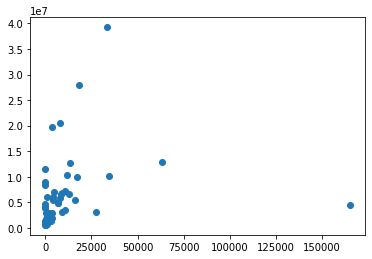

In [36]:
plt.scatter(data=df_combined,x='permit', y='population')

In [45]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        50 non-null     object 
 1   population   50 non-null     int64  
 2   median_rent  50 non-null     int64  
 3   totals       50 non-null     float64
 4   handgun      50 non-null     float64
 5   long_gun     50 non-null     float64
 6   multiple     50 non-null     float64
 7   permit       50 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.5+ KB


In [46]:
df_combined['prob'] =df_combined['totals']/df_combined['population']

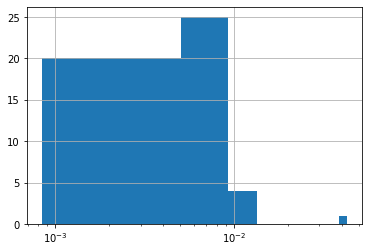

In [50]:
df_combined['prob'].hist()
plt.xscale('log')

In [61]:
df_combined.query('prob < 0.05')

,state,population,median_rent,totals,handgun,long_gun,multiple,permit,prob
0,Alabama,4863300,717,41230.812500,14318.729167,14748.000000,713.833333,6902.687500,0.008478
1,Alaska,741894,1146,7035.895833,2857.479167,3310.333333,182.104167,116.000000,0.009484
2,Arizona,6931071,913,26448.770833,10639.354167,8135.062500,501.520833,4628.812500,0.003816
3,Arkansas,2988248,677,20208.208333,5422.791667,7321.520833,345.229167,3821.104167,0.006763
4,California,39250017,1255,102615.062500,33254.104167,34171.062500,0.000000,33302.583333,0.002614
5,Colorado,5540545,1002,35117.916667,15284.833333,13811.562500,1595.875000,3927.250000,0.006338
6,Connecticut,3576452,1075,20826.375000,5559.875000,4437.541667,0.000000,10603.895833,0.005823
7,Delaware,952065,1018,2892.000000,1395.500000,1274.791667,56.000000,102.833333,0.003038
8,Florida,20612439,1002,75426.083333,38277.833333,23242.250000,1679.541667,8042.270833,0.003659
9,Georgia,10310371,879,38776.541667,11926.375000,10760.125000,537.645833,11480.333333,0.003761


There aren't much useful information that coming from check probability of total numbers of check vs. population. And the numbers of check throughout the state are insiginificant in comparison to the overall population